# EDA

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd

ruta_archivo = '/content/gdrive/Shareddrives/MDS+6 _IDEALISTA/DATA/OLD/es_home_sale_Madrid_2018 (1).csv'

df = pd.read_csv(ruta_archivo, sep=';')

Traducimos las columnas por comodidad a la hora de trabajar y dejamos la info de la documentación para trabajar todo desde el código sin abrir otras pestañas

In [ ]:
# Diccionario de mapeo de nombres en inglés a nombres en español
mapeo_nombres = {
    'ASSETID': 'id_anuncio', # Identificador único del anuncio
    'PERIOD': 'trimestre', # Expresado como AAAAMM, indica el trimestre cuando se extrajo el anuncio. Usamos AAAA03 para el 1er trimestre, AAAA06 el 2do, AAAA09 para el 3 y AAAA12 para el 4
    'PRICE': 'precio', # Precio de venta del anuncio en idealista expresado en euros
    'UNITPRICE': 'precio_m2', # Precio de venta en euros por metro cuadrado (superficie construida)
    'ADTYPOLOGYID': 'id_tipo_anuncio', # Sin documentos
    'ADOPERATIONID': 'id_tipo_operacion', # Sin documentos
    'CONSTRUCTEDAREA': 'area_construida', # Sin documentos
    'ROOMNUMBER': 'n_habitaciones', # Numero de habitaciones
    'BATHNUMBER': 'n_baños', # Numero de baños
    'HASTERRACE': 'terraza', # Variable ficticia para terraza (toma 1 si hay una terraza, 0 en caso contrario)
    'HASLIFT': 'ascensor', # Variable ficticia para ascensor (toma 1 si hay ascensor en el edificio, 0 en caso contrario)
    'HASAIRCONDITIONING': 'aire_acondicionado', # Variable ficticia para aire acondicionado (toma 1 si hay aire acondicionado, 0 en caso contrario)
    'AMENITYID': 'amueblado', # Indica los servicios incluidos (1 - sin muebles, sin servicios de cocina, 2 - servicios de cocina, no muebles, 3 - artículos de cocina, muebles)
    'HASPARKINGSPACE': 'parking', # Variable ficticia para estacionamiento (toma 1 si el estacionamiento está incluido en el anuncio, 0 en caso contrario)
    'ISPARKINGSPACEINCLUDEDINPRICE': 'parking_incluido', # Variable ficticia para estacionamiento (toma 1 si el estacionamiento está incluido en el anuncio, 0 en caso contrario)
    'PARKINGSPACEPRICE': 'precio_parking', # Precio inicial de la plaza de aparcamiento en euros
    # Nota importante: las características de orientación no son características ortogonales, una casa orientada al norte también puede estar orientada al este.
    'HASNORTHORIENTATION': 'orientacion_n', # Variable ficticia para orientación (toma 1 si está orientada al Norte en el anuncio, 0 en caso contrario)
    'HASSOUTHORIENTATION': 'orientacion_s', # Variable ficticia para orientación (toma 1 si está orientada al Sur en el anuncio, 0 en caso contrario)
    'HASEASTORIENTATION': 'orientacion_e', # Variable ficticia para orientación (toma 1 si está orientada al Este en el anuncio, 0 en caso contrario)
    'HASWESTORIENTATION': 'orientacion_o', # Variable ficticia para orientación (toma 1 si está orientada al Oeste en el anuncio, 0 en caso contrario)
    'HASBOXROOM': 'trastero', # Variable ficticia para trastero (toma 1 si el trastero está incluido en el anuncio, 0 en caso contrario)
    'HASWARDROBE': 'armarios', # Variable ficticia para armario/guardarropa (toma 1 si la propiedad tiene, 0 en caso contrario)
    'HASSWIMMINGPOOL': 'piscina', # Variable ficticia para piscina (toma 1 si la piscina está incluida en el anuncio, 0 en caso contrario)
    'HASDOORMAN': 'portero', # Variable ficticia para portero (toma 1 si hay un portero en el edificio, 0 en caso contrario)
    'HASGARDEN': 'jardin', # Variable ficticia para jardín (toma 1 si hay un jardín en el edificio, 0 en caso contrario)
    'ISDUPLEX': 'duplex', # Variable ficticia para apartamento de soltero (denominado estudio en España) (toma 1 si es un apartamento de soltero, 0 en caso contrario)(No es broma, esta asi en la documentacion)
    'ISSTUDIO': 'estudio', # Sin documentos
    'ISINTOPFLOOR': 'atico', # Variable ficticia que indica si el apartamento está ubicado en el último piso (toma 1 si es el último piso, 0 en caso contrario)
    'CONSTRUCTIONYEAR': 'año_contruccion', # Año de construcción (fuente: anunciante)
    'FLOORCLEAN': 'n_piso', # Indica el número de planta plana a partir del valor 0 para planta baja (fuente: anunciante)
    'FLATLOCATIONID': 'exterior_interior', # Indica el tipo de vistas que tiene el piso (1 = exterior, 2 = interior)
    'CADCONSTRUCTIONYEAR': 'cat_año_construcion', # Año de construcción según fuente catastral (fuente: catastro), tenga en cuenta que esta cifra puede diferir de la proporcionada por el anunciante
    'CADMAXBUILDINGFLOOR': 'cat_n_max_pisos', # Piso máximo del edificio (fuente: catastro)
    'CADDWELLINGCOUNT': 'cat_n_vecinos', # Recuento de viviendas en el edificio (fuente: catastro)
    'CADASTRALQUALITYID': 'cat_calidad', # Calidad catastral (fuente: catastro). 0 mejores - 10 peores
    'BUILTTYPEID_1': 'nueva_construccion', # Valor ficticio para condición del piso: 1 nueva construcción y 0 en caso contrario
    'BUILTTYPEID_2': 'a_reformar', # Valor ficticio para condición del piso: 1 segunda mano a restaurar 0 en caso contrario (fuente: anunciante)
    'BUILTTYPEID_3': 'buen_estado', # Valor ficticio para condición del piso: 1 segunda mano en buen estado 0 en caso contrario (fuente: anunciante)
    'DISTANCE_TO_CITY_CENTER': 'distancia_sol', # Distancia en Km al centro de la ciudad (Puerta del Sol)
    'DISTANCE_TO_METRO': 'distancia_metro', # Distancia en Km a la estación de metro más cercana
    'DISTANCE_TO_CASTELLANA': 'distancia_castellana', # Distancia en Km a la Calle: Paseo de la Castellana
    'LONGITUDE': 'longuitud', # Longitud, coordenada geográfica
    'LATITUDE': 'latitud', # Coordenada geográfica de latitud
    'CITYNAME': 'ciudad', # Sin documentos
    'ADTYPOLOGY': 'tipo_anuncio', # Sin documentos
    'ADOPERATION': 'tipo_operacion' # Sin documentos
}

# Renombrar las columnas en el DataFrame
df.rename(columns=mapeo_nombres, inplace=True)

## Pandas Profiling

In [ ]:
!pip install pandas-profiling

In [ ]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df)
profile

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Dropeamos los que sólo tengan una constante
constant_list = ['id_tipo_anuncio','id_tipo_operacion','ciudad','tipo_anuncio','tipo_operacion']
df = df.drop(df[constant_list], axis=1)
# Dropeo tambien "id_anuncio" pues es texto simple y no es útil
df = df.drop(['id_anuncio'], axis=1)
# Dropeo precio_m2 por razones obvias
df = df.drop(['precio_m2'], axis=1)

Veamos el mapa de correlación

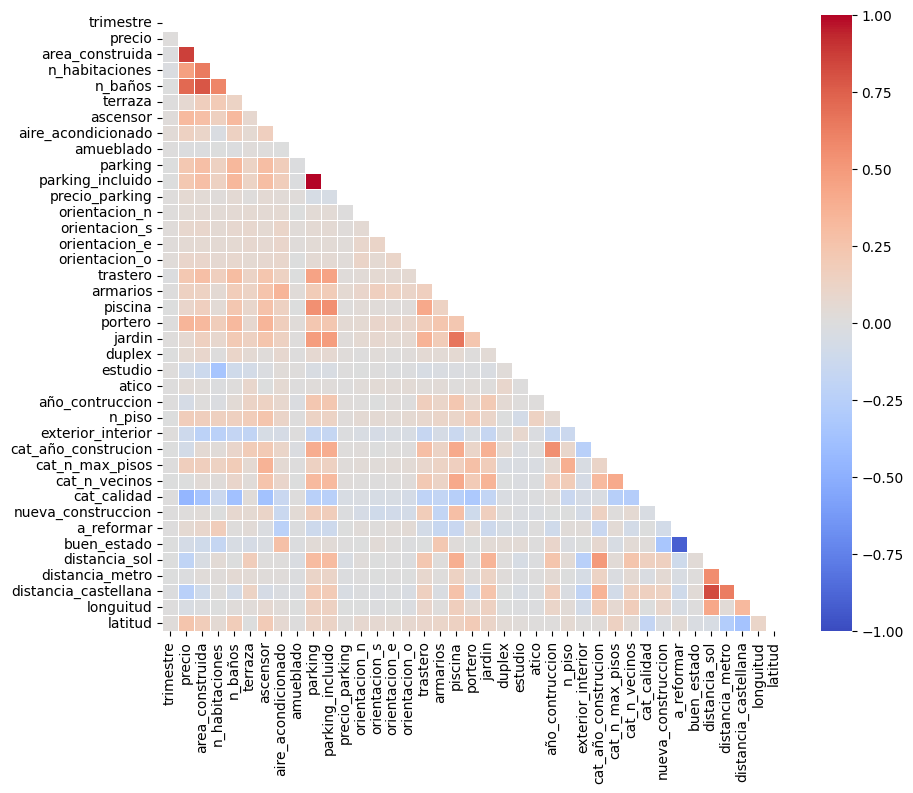

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

correlaciones = df.corr()

# Crear una máscara para ocultar la mitad superior del mapa de calor
mask = np.triu(np.ones_like(correlaciones, dtype=bool))

# Configuración del mapa de calor con la máscara
plt.figure(figsize=(10, 8))
sns.heatmap(correlaciones, cmap='coolwarm', fmt=".2f", linewidths=.5, vmin=-1, vmax=1, mask=mask)

plt.show()

In [ ]:
# Dropeamos 'parking_incluido' por que aporta el mismo valor a precio que 'parking'
df = df.drop(['parking_incluido'], axis=1)

### 3 insights claves a simple vista:

- 'parking_incluido' y 'parking' correlacionan al 1.
Lo cual quizá indica que son columnas rebundantes si están ambas
- 'a_reformar' y 'buen_estado' correlacionan al -1.
Lo cual indica coherencia pues es dificil que cumpla ambos criterios
- 'n_baños' es mas importante que 'n_habitaciones' **¿Por qué ocurre esto?**

In [ ]:
# Correlaciones ordenadas
df.corr()['precio'].sort_values(ascending=False)

precio                  1.000000
area_construida         0.859471
n_baños                 0.717569
precio_m2_2             0.587778
precio_m2               0.587778
n_habitaciones          0.464571
portero                 0.348133
ascensor                0.316820
latitud                 0.246950
trastero                0.224095
parking                 0.220511
parking_incluido        0.220511
n_piso                  0.176653
cat_n_max_pisos         0.165207
aire_acondicionado      0.144801
armarios                0.144686
piscina                 0.101334
orientacion_o           0.096046
orientacion_s           0.082582
jardin                  0.070137
terraza                 0.064280
a_reformar              0.061800
duplex                  0.059065
precio_parking          0.054933
orientacion_e           0.053078
orientacion_n           0.045758
atico                   0.031285
trimestre               0.012986
nueva_construccion      0.010084
cat_n_vecinos          -0.000711
amueblado 

MAE: 7888.754434221409
RMSE: 10575.536422969808
APE Sobrevaloración: 6.06%
APE Subestimación: 4.44%
APE Media: 5.25%


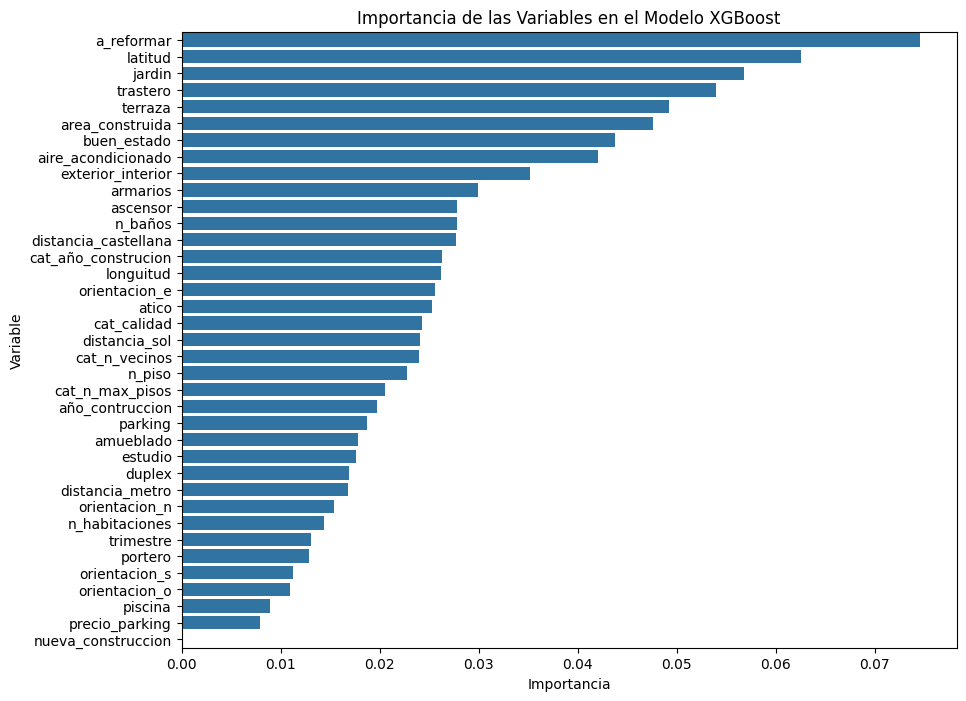

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Filtrar filas donde 'precio' sea menor a 100000
df_filtrado = df[df['precio'] < 100000]

# Crear las variables predictoras (X) y la variable objetivo (y)
X = df_filtrado.drop(['precio'], axis=1)
y = df_filtrado['precio']

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Configurar el modelo XGBoost de regresión
modelo_xgboost = xgb.XGBRegressor(objective='reg:squarederror', random_state=0)

# Entrenar el modelo
modelo_xgboost.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
predicciones = modelo_xgboost.predict(X_test)

# Evaluar el modelo
mae = mean_absolute_error(y_test, predicciones)
rmse = mean_squared_error(y_test, predicciones, squared=False)
# Calcular APE para casos de sobrevaloración
ape_sobrevaloracion = np.mean(np.where(predicciones > y_test, (predicciones - y_test) / y_test * 100, 0))
# Calcular APE para casos de subestimación
ape_subestimacion = np.mean(np.where(predicciones < y_test, (y_test - predicciones) / y_test * 100, 0))
# Calcular la media de APE para ambos casos
ape_media = (ape_sobrevaloracion + ape_subestimacion) / 2

# Imprimir métricas de evaluación
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'APE Sobrevaloración: {ape_sobrevaloracion:.2f}%')
print(f'APE Subestimación: {ape_subestimacion:.2f}%')
print(f'APE Media: {ape_media:.2f}%')

# Obtener la importancia de las variables
importancia_variables = modelo_xgboost.feature_importances_

# Crear un DataFrame con las variables y su importancia
df_importancia = pd.DataFrame({'Variable': X_train.columns, 'Importancia': importancia_variables})

# Ordenar el DataFrame por importancia en orden descendente
df_importancia = df_importancia.sort_values(by='Importancia', ascending=False)

# Visualizar la importancia de las variables
plt.figure(figsize=(10, 8))
sns.barplot(x='Importancia', y='Variable', data=df_importancia)
plt.title('Importancia de las Variables en el Modelo XGBoost')
plt.show()

**Interpretación del MAE (Error Absoluto Medio):**

- Un MAE de 0 significa que las predicciones son perfectas y coinciden exactamente con los valores reales.
- Cuanto mayor sea el MAE, mayor será la diferencia promedio entre las predicciones y los valores reales.
- El MAE se mide en las mismas unidades que la variable objetivo, lo que facilita la interpretación.

**Interpretación del APE (Error Porcentual Absoluto):**

- Un APE de 0% indica que las predicciones coinciden exactamente con los valores reales en términos porcentuales.
- El APE representa el error absoluto como un porcentaje de la variable objetivo, facilitando la interpretación en la misma escala que la variable objetivo.
- A diferencia de métricas como el **RMSE**, el APE no penaliza más fuertemente los errores grandes, ya que mantiene la magnitud de los errores en términos porcentuales.
- El APE es útil para evaluar la precisión del modelo en términos relativos, lo que significa que proporciona información sobre la magnitud del error en relación con el valor verdadero de la variable objetivo.

**Interpretación del RMSE (Raíz del Error Cuadrático Medio):**

- Similar al MSE, pero la raíz cuadrada convierte las unidades a la escala original de la variable objetivo.
- Un RMSE de 0 indica predicciones perfectas.
- Como el MSE, penaliza más fuertemente los errores grandes.

**Con esto se entiende que los pesos más grandes están influenciando mucho la diferencia de precios.**

**Próximos pasos, por ejemplo:**

- Realizar un análisis de residuos para comprender mejor dónde el modelo tiene dificultades y si hay patrones sistemáticos en los errores.

- Considerar la inclusión de características adicionales o la optimización de hiperparámetros para mejorar el rendimiento del modelo.

- Evaluar la variabilidad de precios en diferentes áreas de Madrid y cómo afecta la precisión del modelo en distintos segmentos del mercado inmobiliario.

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)

path = r'/content/es_home_sale_Madrid_2018.csv'
df_madrid = pd.read_csv(path, sep=";")


In [ ]:
df_madrid.shape

(94815, 43)

In [ ]:
df_madrid.isnull().sum()


ASSETID                              0
PERIOD                               0
PRICE                                0
UNITPRICE                            0
ADTYPOLOGYID                         0
ADOPERATIONID                        0
CONSTRUCTEDAREA                      0
ROOMNUMBER                           0
BATHNUMBER                           0
HASTERRACE                           0
HASLIFT                              0
HASAIRCONDITIONING                   0
AMENITYID                            0
HASPARKINGSPACE                      0
ISPARKINGSPACEINCLUDEDINPRICE        0
PARKINGSPACEPRICE                    0
HASNORTHORIENTATION                  0
HASSOUTHORIENTATION                  0
HASEASTORIENTATION                   0
HASWESTORIENTATION                   0
HASBOXROOM                           0
HASWARDROBE                          0
HASSWIMMINGPOOL                      0
HASDOORMAN                           0
HASGARDEN                            0
ISDUPLEX                 

In [ ]:
df_madrid.describe()

,PERIOD,PRICE,UNITPRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASTERRACE,HASLIFT,HASAIRCONDITIONING,AMENITYID,HASPARKINGSPACE,ISPARKINGSPACEINCLUDEDINPRICE,PARKINGSPACEPRICE,HASNORTHORIENTATION,HASSOUTHORIENTATION,HASEASTORIENTATION,HASWESTORIENTATION,HASBOXROOM,HASWARDROBE,HASSWIMMINGPOOL,HASDOORMAN,HASGARDEN,ISDUPLEX,ISSTUDIO,ISINTOPFLOOR,CONSTRUCTIONYEAR,FLOORCLEAN,FLATLOCATIONID,CADCONSTRUCTIONYEAR,CADMAXBUILDINGFLOOR,CADDWELLINGCOUNT,CADASTRALQUALITYID,BUILTTYPEID_1,BUILTTYPEID_2,BUILTTYPEID_3,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_CASTELLANA,LONGITUDE,LATITUDE
count,94815.000000,9.481500e+04,94815.000000,94815.000000,94815.000000,94815.000000,94815.000000,94815.000000,94815.000000,94815.000000,94815.000000,94815.000000,94815.000000,94815.000000,94815.000000,94815.000000,94815.000000,94815.000000,94815.000000,94815.000000,94815.000000,94815.000000,94815.000000,94815.000000,94815.000000,38942.000000,90969.000000,88428.000000,94815.000000,94815.000000,94815.000000,94814.000000,94815.000000,94815.000000,94815.000000,94815.000000,94815.000000,94815.000000,94815.000000,94815.000000
mean,201808.613289,3.961101e+05,3661.051534,101.397163,2.580900,1.585456,0.355260,0.695597,0.448600,2.922660,0.225102,0.225102,719.872668,0.107820,0.236123,0.202637,0.148458,0.258851,0.572009,0.148162,0.249581,0.184528,0.026388,0.027548,0.023161,1964.693493,2.747903,1.136880,1965.703697,6.376470,39.187164,4.852184,0.030396,0.186563,0.783041,4.486269,0.480916,2.679227,-3.686408,40.421083
std,3.684625,4.170744e+05,1700.499398,67.078259,1.244878,0.843024,0.478595,0.460157,0.497354,0.314865,0.417651,0.417651,7513.876356,0.310155,0.424701,0.401966,0.355555,0.438006,0.494790,0.355263,0.432773,0.387916,0.160288,0.163676,0.150415,55.891001,2.257536,0.343722,29.113566,2.845497,54.254387,1.462988,0.171675,0.389563,0.412177,2.994906,1.433584,2.581346,0.039239,0.035495
min,201803.000000,2.100000e+04,805.309735,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,1.000000,1623.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.007647,0.001416,0.001435,-3.833611,36.756391
25%,201806.000000,1.600000e+05,2240.000000,62.000000,2.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1955.000000,1.000000,1.000000,1955.000000,5.000000,12.000000,4.000000,0.000000,0.000000,1.000000,2.407711,0.213458,1.035143,-3.708474,40.396868
50%,201809.000000,2.620000e+05,3480.000000,83.000000,3.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1968.000000,2.000000,1.000000,1967.000000,6.000000,21.000000,5.000000,0.000000,0.000000,1.000000,4.123505,0.331882,1.956978,-3.694104,40.423295
75%,201812.000000,4.670000e+05,4744.623034,117.000000,3.000000,2.000000,1.000000,1.000000,1.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1987.000000,4.000000,1.000000,1984.000000,8.000000,40.000000,6.000000,0.000000,0.000000,1.000000,6.213463,0.523025,3.840641,-3.666227,40.441998
max,201812.000000,8.133000e+06,9997.560976,985.000000,93.000000,20.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,925001.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2291.000000,11.000000,2.000000,2018.000000,26.000000,1499.000000,9.000000,1.000000,1.000000,1.000000,415.752584,399.477366,412.803688,-2.753303,40.520637


In [ ]:
df_madrid[df_madrid['PRICE']==21000]

,ASSETID,PERIOD,PRICE,UNITPRICE,ADTYPOLOGYID,ADOPERATIONID,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASTERRACE,HASLIFT,HASAIRCONDITIONING,AMENITYID,HASPARKINGSPACE,ISPARKINGSPACEINCLUDEDINPRICE,PARKINGSPACEPRICE,HASNORTHORIENTATION,HASSOUTHORIENTATION,HASEASTORIENTATION,HASWESTORIENTATION,HASBOXROOM,HASWARDROBE,HASSWIMMINGPOOL,HASDOORMAN,HASGARDEN,ISDUPLEX,ISSTUDIO,ISINTOPFLOOR,CONSTRUCTIONYEAR,FLOORCLEAN,FLATLOCATIONID,CADCONSTRUCTIONYEAR,CADMAXBUILDINGFLOOR,CADDWELLINGCOUNT,CADASTRALQUALITYID,BUILTTYPEID_1,BUILTTYPEID_2,BUILTTYPEID_3,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_CASTELLANA,LONGITUDE,LATITUDE,CITYNAME,ADTYPOLOGY,ADOPERATION
53986,A12955045910479575710,201806,21000,875.0,HOME,SALE,24,1,1,0,0,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1910.0,2.0,NaN,1910,3,42,7.0,0,0,1,3.907605,0.247883,2.479985,-3.664956,40.397675,Madrid,HOME,SALE


In [ ]:
df_madrid[df_madrid['PRICE']==8133000]

,ASSETID,PERIOD,PRICE,UNITPRICE,ADTYPOLOGYID,ADOPERATIONID,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASTERRACE,HASLIFT,HASAIRCONDITIONING,AMENITYID,HASPARKINGSPACE,ISPARKINGSPACEINCLUDEDINPRICE,PARKINGSPACEPRICE,HASNORTHORIENTATION,HASSOUTHORIENTATION,HASEASTORIENTATION,HASWESTORIENTATION,HASBOXROOM,HASWARDROBE,HASSWIMMINGPOOL,HASDOORMAN,HASGARDEN,ISDUPLEX,ISSTUDIO,ISINTOPFLOOR,CONSTRUCTIONYEAR,FLOORCLEAN,FLATLOCATIONID,CADCONSTRUCTIONYEAR,CADMAXBUILDINGFLOOR,CADDWELLINGCOUNT,CADASTRALQUALITYID,BUILTTYPEID_1,BUILTTYPEID_2,BUILTTYPEID_3,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_CASTELLANA,LONGITUDE,LATITUDE,CITYNAME,ADTYPOLOGY,ADOPERATION
56066,A17400384699956653141,201812,8133000,8707.708779,HOME,SALE,934,8,10,0,0,0,3,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1986.0,3.0,1.0,1986,0,2,2.0,0,0,1,3.252209,0.507632,0.123339,-3.690056,40.44387,Madrid,HOME,SALE


In [ ]:
df_madrid[df_madrid['FLOORCLEAN']==-1]

,ASSETID,PERIOD,PRICE,UNITPRICE,ADTYPOLOGYID,ADOPERATIONID,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASTERRACE,HASLIFT,HASAIRCONDITIONING,AMENITYID,HASPARKINGSPACE,ISPARKINGSPACEINCLUDEDINPRICE,PARKINGSPACEPRICE,HASNORTHORIENTATION,HASSOUTHORIENTATION,HASEASTORIENTATION,HASWESTORIENTATION,HASBOXROOM,HASWARDROBE,HASSWIMMINGPOOL,HASDOORMAN,HASGARDEN,ISDUPLEX,ISSTUDIO,ISINTOPFLOOR,CONSTRUCTIONYEAR,FLOORCLEAN,FLATLOCATIONID,CADCONSTRUCTIONYEAR,CADMAXBUILDINGFLOOR,CADDWELLINGCOUNT,CADASTRALQUALITYID,BUILTTYPEID_1,BUILTTYPEID_2,BUILTTYPEID_3,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_CASTELLANA,LONGITUDE,LATITUDE,CITYNAME,ADTYPOLOGY,ADOPERATION
38,A8615594653188080606,201803,372000,4133.333333,HOME,SALE,90,2,1,0,1,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,NaN,-1.0,1.0,1930,4,17,1.0,0,0,1,0.652881,0.158530,1.467225,-3.710760,40.419087,Madrid,HOME,SALE
228,A6207878791173772035,201803,99000,1414.285714,HOME,SALE,70,3,2,0,0,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1890.0,-1.0,1.0,1890,5,13,3.0,0,0,1,0.911824,0.483636,1.653654,-3.713430,40.412954,Madrid,HOME,SALE
334,A231761552035612860,201803,318000,3087.378641,HOME,SALE,103,2,1,0,1,0,3,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,NaN,-1.0,1.0,1978,6,26,6.0,0,0,1,1.292518,0.320109,1.797884,-3.714453,40.408290,Madrid,HOME,SALE
338,A8766165742139390725,201803,221000,3157.142857,HOME,SALE,70,2,1,0,1,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,NaN,-1.0,2.0,1900,5,11,4.0,0,1,0,0.646464,0.169481,1.314399,-3.709265,40.412547,Madrid,HOME,SALE
515,A12666535348950398932,201803,129000,3685.714286,HOME,SALE,35,1,1,0,1,0,3,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1910.0,-1.0,1.0,1910,5,12,4.0,0,0,1,0.350129,0.226299,0.734361,-3.702558,40.413588,Madrid,HOME,SALE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93512,A5475500600588629035,201812,1214000,3035.000000,HOME,SALE,400,0,4,0,0,1,3,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,NaN,-1.0,2.0,1953,8,24,5.0,0,0,1,3.223542,0.565495,0.375272,-3.695891,40.444917,Madrid,HOME,SALE
93752,A2741576669892089367,201812,92000,1614.035088,HOME,SALE,57,2,1,0,0,0,3,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,NaN,-1.0,1.0,1966,12,19,6.0,0,0,1,4.530628,0.321153,5.213788,-3.755199,40.405445,Madrid,HOME,SALE
94278,A14117032423548931495,201812,164000,1547.169811,HOME,SALE,106,3,1,0,1,0,3,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,NaN,-1.0,2.0,1977,26,308,3.0,0,1,0,7.171585,0.286796,1.084270,-3.673001,40.476602,Madrid,HOME,SALE
94306,A18315215544990480475,201812,131000,2620.000000,HOME,SALE,50,2,1,0,0,0,3,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1940.0,-1.0,2.0,1940,6,15,6.0,0,0,1,2.260777,0.297433,3.041964,-3.729792,40.412059,Madrid,HOME,SALE


In [ ]:
df_madrid[df_madrid['FLOORCLEAN'].isnull()]

,ASSETID,PERIOD,PRICE,UNITPRICE,ADTYPOLOGYID,ADOPERATIONID,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASTERRACE,HASLIFT,HASAIRCONDITIONING,AMENITYID,HASPARKINGSPACE,ISPARKINGSPACEINCLUDEDINPRICE,PARKINGSPACEPRICE,HASNORTHORIENTATION,HASSOUTHORIENTATION,HASEASTORIENTATION,HASWESTORIENTATION,HASBOXROOM,HASWARDROBE,HASSWIMMINGPOOL,HASDOORMAN,HASGARDEN,ISDUPLEX,ISSTUDIO,ISINTOPFLOOR,CONSTRUCTIONYEAR,FLOORCLEAN,FLATLOCATIONID,CADCONSTRUCTIONYEAR,CADMAXBUILDINGFLOOR,CADDWELLINGCOUNT,CADASTRALQUALITYID,BUILTTYPEID_1,BUILTTYPEID_2,BUILTTYPEID_3,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_CASTELLANA,LONGITUDE,LATITUDE,CITYNAME,ADTYPOLOGY,ADOPERATION
160,A1547432608711950038,201803,184000,1936.842105,HOME,SALE,95,3,1,0,0,1,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1900.0,NaN,NaN,1900,5,19,6.0,0,0,1,0.840971,0.148610,1.396825,-3.709514,40.410419,Madrid,HOME,SALE
193,A16581952601663971985,201803,650000,5200.000000,HOME,SALE,125,4,2,0,1,0,3,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1900.0,NaN,1.0,1900,5,10,3.0,0,1,0,0.511389,0.029588,1.341114,-3.709592,40.417851,Madrid,HOME,SALE
207,A6102099088355104043,201803,654000,5190.476190,HOME,SALE,126,2,2,1,1,1,3,1,1,1,0,0,0,1,1,0,0,1,0,0,0,0,2001.0,NaN,1.0,2001,5,18,4.0,0,0,1,1.109589,0.147635,1.521793,-3.711166,40.408355,Madrid,HOME,SALE
295,A3567533886697832321,201803,171000,3489.795918,HOME,SALE,49,2,1,0,0,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1913,6,38,6.0,0,1,0,1.087535,0.196505,1.554200,-3.711477,40.408768,Madrid,HOME,SALE
327,A12056131090713743451,201803,196000,2063.157895,HOME,SALE,95,1,1,0,0,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1950,11,12,0.0,0,0,1,0.617364,0.195499,1.387883,-3.709520,40.420014,Madrid,HOME,SALE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94701,A8895242811196181557,201812,284000,3053.763441,HOME,SALE,93,2,2,1,1,0,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,NaN,NaN,2.0,1966,8,96,6.0,0,0,1,5.379664,0.089304,4.246984,-3.641857,40.406022,Madrid,HOME,SALE
94703,A10215040971340998724,201809,319000,2823.008850,HOME,SALE,113,3,1,1,1,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1944.0,NaN,2.0,1944,7,16,6.0,0,1,0,4.145840,0.506818,2.823666,-3.656452,40.425985,Madrid,HOME,SALE
94713,A16749072997032974894,201812,126000,3073.170732,HOME,SALE,41,2,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1930.0,NaN,2.0,1930,6,23,5.0,0,0,1,4.536340,0.313931,2.798247,-3.655542,40.434242,Madrid,HOME,SALE
94761,A9922654306483106337,201812,128000,1333.333333,HOME,SALE,96,3,2,0,0,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1983,4,9,6.0,0,0,1,4.190155,0.715066,1.490777,-3.702952,40.378955,Madrid,HOME,SALE


In [ ]:
#eliminar caddwellingcount=1
df_madrid[(df_madrid['CADDWELLINGCOUNT']==1) & (~df_madrid['FLOORCLEAN'].isnull())]['FLOORCLEAN'].unique()


array([ 1.,  2.,  3.,  4.,  6.,  0.,  7., 11.,  5.,  8., -1.])

In [ ]:
(df_madrid['CADDWELLINGCOUNT']==1).value_counts()

False    94124
True       691
Name: CADDWELLINGCOUNT, dtype: int64

In [ ]:
df_madrid[(df_madrid['CADDWELLINGCOUNT']==1) & (~df_madrid['FLOORCLEAN'].isnull())]['FLOORCLEAN'].unique()


array([ 1.,  2.,  3.,  4.,  6.,  0.,  7., 11.,  5.,  8., -1.])

In [ ]:
df_madrid[(df_madrid['CADDWELLINGCOUNT']==1) & (~df_madrid['FLOORCLEAN'].isnull())]


,ASSETID,PERIOD,PRICE,UNITPRICE,ADTYPOLOGYID,ADOPERATIONID,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASTERRACE,HASLIFT,HASAIRCONDITIONING,AMENITYID,HASPARKINGSPACE,ISPARKINGSPACEINCLUDEDINPRICE,PARKINGSPACEPRICE,HASNORTHORIENTATION,HASSOUTHORIENTATION,HASEASTORIENTATION,HASWESTORIENTATION,HASBOXROOM,HASWARDROBE,HASSWIMMINGPOOL,HASDOORMAN,HASGARDEN,ISDUPLEX,ISSTUDIO,ISINTOPFLOOR,CONSTRUCTIONYEAR,FLOORCLEAN,FLATLOCATIONID,CADCONSTRUCTIONYEAR,CADMAXBUILDINGFLOOR,CADDWELLINGCOUNT,CADASTRALQUALITYID,BUILTTYPEID_1,BUILTTYPEID_2,BUILTTYPEID_3,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_CASTELLANA,LONGITUDE,LATITUDE,CITYNAME,ADTYPOLOGY,ADOPERATION
376,A11007578246409331998,201803,1068000,3955.555556,HOME,SALE,270,7,3,0,1,0,3,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,NaN,1.0,1.0,1976,1,1,4.0,0,0,1,0.744264,0.152216,0.436112,-3.698128,40.411480,Madrid,HOME,SALE
631,A2751071723362404399,201803,111000,2018.181818,HOME,SALE,55,1,1,1,0,1,3,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,NaN,2.0,1.0,1930,1,1,7.0,0,0,1,3.831860,0.567580,2.555167,-3.663480,40.401008,Madrid,HOME,SALE
980,A16090245058682602995,201803,1085000,4173.076923,HOME,SALE,260,9,3,0,1,0,3,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,NaN,1.0,1.0,1976,1,1,4.0,0,0,1,0.773427,0.181022,0.431241,-3.697972,40.411237,Madrid,HOME,SALE
1702,A10355501231551452199,201803,821000,3420.833333,HOME,SALE,240,4,2,0,1,1,3,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,NaN,3.0,1.0,1930,0,1,1.0,0,0,1,0.402848,0.087930,0.985871,-3.704630,40.420152,Madrid,HOME,SALE
1746,A598950146270249548,201803,950000,5757.575758,HOME,SALE,165,2,3,0,1,1,3,0,0,1,1,0,0,1,1,0,0,1,0,0,0,0,1930.0,4.0,1.0,1930,6,1,3.0,0,0,1,0.330068,0.135677,0.941159,-3.704270,40.419532,Madrid,HOME,SALE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94565,A870511412910319415,201812,367000,1223.333333,HOME,SALE,300,3,1,1,1,1,3,1,1,1,0,0,0,0,1,0,0,1,0,0,0,0,2006.0,2.0,1.0,2006,3,1,8.0,0,0,1,6.785291,0.304968,5.061191,-3.629210,40.438776,Madrid,HOME,SALE
94574,A14243810374644302427,201812,240000,1983.471074,HOME,SALE,121,1,1,1,1,1,3,1,1,1,0,0,1,0,1,0,0,0,0,0,0,0,2006.0,2.0,1.0,2006,3,1,8.0,0,0,1,6.826700,0.321074,5.122933,-3.628403,40.438213,Madrid,HOME,SALE
94638,A9012963601745772336,201812,89000,1112.500000,HOME,SALE,80,3,1,0,1,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,1.0,1971,1,1,4.0,0,0,1,13.242943,2.448341,11.556427,-3.553854,40.450171,Madrid,HOME,SALE
94803,A10172299496973656620,201812,388000,1410.909091,HOME,SALE,275,5,3,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1968.0,2.0,1.0,1968,1,1,7.0,0,1,0,7.672289,0.491438,6.559958,-3.614621,40.404737,Madrid,HOME,SALE


In [ ]:
df_madrid=df_madrid.drop(columns=['CONSTRUCTIONYEAR', "ADTYPOLOGYID", "ADOPERATIONID"])


In [ ]:
perc_casos = df_madrid[df_madrid['ASSETID'].duplicated(keep=False)]['ASSETID'].nunique()/df_madrid['ASSETID'].nunique()

df_madrid[df_madrid['FLATLOCATIONID'].isnull()]


,ASSETID,PERIOD,PRICE,UNITPRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASTERRACE,HASLIFT,HASAIRCONDITIONING,AMENITYID,HASPARKINGSPACE,ISPARKINGSPACEINCLUDEDINPRICE,PARKINGSPACEPRICE,HASNORTHORIENTATION,HASSOUTHORIENTATION,HASEASTORIENTATION,HASWESTORIENTATION,HASBOXROOM,HASWARDROBE,HASSWIMMINGPOOL,HASDOORMAN,HASGARDEN,ISDUPLEX,ISSTUDIO,ISINTOPFLOOR,FLOORCLEAN,FLATLOCATIONID,CADCONSTRUCTIONYEAR,CADMAXBUILDINGFLOOR,CADDWELLINGCOUNT,CADASTRALQUALITYID,BUILTTYPEID_1,BUILTTYPEID_2,BUILTTYPEID_3,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_CASTELLANA,LONGITUDE,LATITUDE,CITYNAME,ADTYPOLOGY,ADOPERATION
27,A11062411078831478929,201803,2606000,6614.213198,394,11,9,0,0,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,3.0,NaN,1935,6,16,2.0,0,0,1,0.523289,0.227916,1.342065,-3.709927,40.416074,Madrid,HOME,SALE
36,A8502949232699048728,201803,315000,3662.790698,86,3,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,4.0,NaN,1850,4,5,4.0,0,0,1,0.768077,0.180224,1.414413,-3.710211,40.411721,Madrid,HOME,SALE
92,A17351323363085385366,201803,195000,6964.285714,28,1,1,0,1,0,3,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,3.0,NaN,1956,6,12,7.0,0,0,1,1.108507,0.326961,1.699694,-3.713041,40.409551,Madrid,HOME,SALE
152,A14433161298037854797,201803,181000,5838.709677,31,1,1,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,NaN,1900,5,12,6.0,0,0,1,1.157976,0.169400,1.599803,-3.712097,40.408331,Madrid,HOME,SALE
160,A1547432608711950038,201803,184000,1936.842105,95,3,1,0,0,1,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,1900,5,19,6.0,0,0,1,0.840971,0.148610,1.396825,-3.709514,40.410419,Madrid,HOME,SALE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94693,A6216871720214679919,201812,94000,1492.063492,63,2,1,0,0,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,1964,6,37,6.0,0,0,1,4.322943,0.457516,2.951741,-3.659392,40.397482,Madrid,HOME,SALE
94698,A1648607081451652924,201812,178000,2405.405405,74,3,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1.0,NaN,1962,5,11,7.0,0,0,1,5.081731,0.736383,3.853100,-3.647742,40.400385,Madrid,HOME,SALE
94730,A17390996892963923855,201812,107000,4280.000000,25,1,1,0,1,0,3,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0.0,NaN,1930,6,33,4.0,0,0,1,3.033728,0.288177,1.031054,-3.703686,40.443842,Madrid,HOME,SALE
94761,A9922654306483106337,201812,128000,1333.333333,96,3,2,0,0,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,1983,4,9,6.0,0,0,1,4.190155,0.715066,1.490777,-3.702952,40.378955,Madrid,HOME,SALE


In [ ]:
df_madrid[df_madrid['ASSETID'].duplicated(keep=False)]['ASSETID'].nunique()
df_madrid['ASSETID'].nunique()

75804

In [ ]:
perc_casos = df_madrid[df_madrid['ASSETID'].duplicated(keep=False)]['ASSETID'].nunique()/df_madrid['ASSETID'].nunique()
